In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
from PIL import Image
import re

In [2]:
n_images = os.listdir('in_sgl')

In [3]:
img_1 = []
for i in range(len(n_images)):
    if n_images[i][:4] == 'img9':
        img_1.append(n_images[i])

In [4]:
img_input_1 = np.zeros((214*19, 214*19))
img_label_1 = np.ones((214*19, 214*19, 3)) * 255

for i in range(len(img_1)):
    img_input = Image.open('in_sgl/'+img_1[i])
    img_label = Image.open('out/'+img_1[i])
    r_c = re.findall(r'\d+', img_1[i])
    x1 = int(r_c[1]) * 214
    x2 = x1 + 214
    y1 = int(r_c[2]) * 214
    y2 = y1 + 214
    img_input_1[x1:x2, y1:y2] = np.asarray(img_input)
    img_label_1[x1:x2, y1:y2] = np.asarray(img_label)
img_label_1 = img_label_1.astype(int)

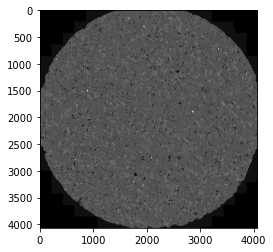

In [5]:
plt.imshow(img_input_1, cmap=plt.cm.gray)

Removing edge effect noise if it necessary (Four images of nine images have uniform noise, we were removing it and restoring the original distribution by grayscale values):

In [6]:
for i in range(img_input_1.shape[0]):
    for j in range(img_input_1.shape[1]):
        if img_input_1[i, j] == 0:
            pass
        else:
            img_input_1[i, j] = img_input_1[i, j] - 16
            if img_input_1[i, j] < 0:
                img_input_1[i, j] = 0
            else:
                pass

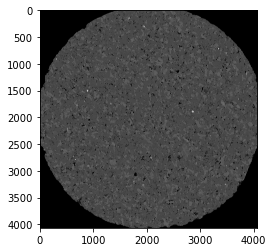

In [7]:
plt.imshow(img_input_1, cmap = 'gray')

In [8]:
255 / np.max(img_input_1)

1.0714285714285714

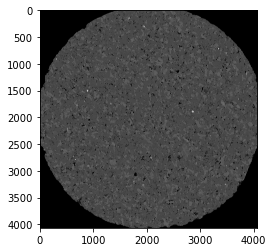

In [9]:
img_input_1 = img_input_1 * 1.0714285714285714
plt.imshow(img_input_1, cmap = 'gray')

In [232]:
imageio.imwrite('img_9.png', img_input_1.astype(np.uint8))